# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

#### 1. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 2. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

BE CREATIVE! You can use whatever method you want, in order to climb the leaderboard. The only rule is that it must be your own work. Given that, you can use all the online resources you want. 

#### 3. 🎥 Create a YouTube video (10-15 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. *Select* projects will also be presented live by the group during the last class.

### 1. Read data into your notebook with the Kaggle API.

In [92]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# install Kaggle
! pip install kaggle
!mkdir ~/.kaggle

# read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!mkdir data

# connect drive to colab.
from google.colab import drive
drive.mount('/content/drive')

# download the dataset from the competition page
! kaggle competitions download -c detecting-french-texts-difficulty-level-2022

# unzip data
!unzip "detecting-french-texts-difficulty-level-2022.zip" -d data



Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
mkdir: cannot create directory ‘data’: File exists
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
detecting-french-texts-difficulty-level-2022.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  detecting-french-texts-difficulty-level-2022.zip
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Have a representation of the data.

In [93]:
# read in your training data
import pandas as pd
import numpy as np

# set df to the data 
df = pd.read_csv('/content/data/training_data.csv')

# have a representation of the data.
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [94]:
# value counts of language level
df['difficulty'].value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

### 2. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 2.1.Baseline
What is the baseline for this classification problem?

In [95]:
# import packages.
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


# import function from my file
import fonction_sbb
from fonction_sbb import *

In [96]:
# creating a copy of the dataframe for this model
df1 = df.copy()

# encoding difficulty
le = preprocessing.LabelEncoder()
le.fit(df1.difficulty)
df1['difficulty_encoded'] = le.transform(df1.difficulty)
df1['difficulty'] = df1['difficulty_encoded']
print(df1)

        id                                           sentence  difficulty  \
0        0  Les coûts kilométriques réels peuvent diverger...           4   
1        1  Le bleu, c'est ma couleur préférée mais je n'a...           0   
2        2  Le test de niveau en français est sur le site ...           0   
3        3           Est-ce que ton mari est aussi de Boston?           0   
4        4  Dans les écoles de commerce, dans les couloirs...           2   
...    ...                                                ...         ...   
4795  4795  C'est pourquoi, il décida de remplacer les hab...           3   
4796  4796  Il avait une de ces pâleurs splendides qui don...           4   
4797  4797  Et le premier samedi de chaque mois, venez ren...           1   
4798  4798  Les coûts liés à la journalisation n'étant pas...           5   
4799  4799  Sur le sable, la mer haletait de toute la resp...           5   

      difficulty_encoded  
0                      4  
1                    

In [97]:
np.random.seed = 0
# select features
X = df1['sentence']
y = df1['difficulty']

# splitting the data between train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
# representation of X
X_train

70                                Comment t'appelles-tu ?
4347    Voilà qui serait en effet de nature à simplifi...
1122    Les pèlerins partagèrent alors cette célébrati...
4570                          Qu'est-ce que vous faites ?
34      En voici un des moins obscurs : "Plus nous dev...
                              ...                        
1033    Les micro-changements apportés par ce type d'u...
3264    J'allais à la poste quand j'ai croisé ma cousi...
1653    Au cours des années 1970 et 1980, plusieurs gr...
2607    Stop : tout d'abord, figurez-vous que les vrai...
2732    "On s'est alors dit que le terrain commençait ...
Name: sentence, Length: 3840, dtype: object

In [99]:
# representation of y
y_train

70      0
4347    3
1122    4
4570    0
34      5
       ..
1033    3
3264    1
1653    4
2607    3
2732    2
Name: difficulty, Length: 3840, dtype: int64

#### 2.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [100]:
# Define classifier
log_reg = LogisticRegression()
tfidfVectorizer = TfidfVectorizer()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidfVectorizer),
                 ('classifier', log_reg)])

# the "fit" function returns a trained model that can then be used to make predictions on new data.
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

Calculate accuracy, precision, recall and F1 score on the test set.

In [101]:
y_pred = pipe.predict(X_test)

# call classification report function from my file fonction_sbb
print_classification_report(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.53      0.58      0.55       161
           1       0.41      0.37      0.39       164
           2       0.43      0.40      0.42       160
           3       0.43      0.46      0.44       144
           4       0.51      0.42      0.46       173
           5       0.48      0.58      0.53       158

    accuracy                           0.47       960
   macro avg       0.46      0.47      0.46       960
weighted avg       0.47      0.47      0.46       960



In [102]:
# print classification metrics
print_classification_metrics(y_test, y_pred)

Accuracy: 0.4667
Recall: 0.4667
F1 Score: 0.4640


Display confusion matrix to have a visual representation.
Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.


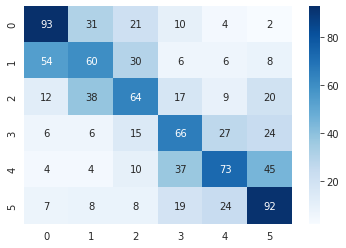

In [103]:
# Calculate the confusion matrix
display_confusion_matrix(y_test, y_pred)

# Let's see the example of the first column:
- the model predicted 94 sentence A1 that were of level A1.
- the model predicted 54 sentence A1 that were of level A2.
- the model predicted 12 sentence A1 that were of level B1.
- the model predicted 6 sentence A1 that were of level B2.
- the model predicted 4 sentence A1 that were of level C1.
- the model predictet 7 sentence A1 that were of level C2.



#### 2.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [104]:
# import some additional packages 
from sklearn.neighbors import KNeighborsClassifier

In [105]:
# Define classifier
reg_knn = KNeighborsClassifier()
tfidfVectorizer = TfidfVectorizer()


# Vectorize training data
X_train_vectors = tfidfVectorizer.fit_transform(X_train)

#create pipeline
pipe_knn = Pipeline([('vectorizer', tfidfVectorizer),
                     ('classifier', reg_knn)])

# the "fit" function returns a trained model that can then be used to make predictions on new data.
pipe_knn.fit(X_train, y_train)

# making a prediction with the knn model
y_pred_knn = pipe_knn.predict(X_test)


Calculate accuracy, precision, recall and F1 score on the test set.

In [106]:
print_classification_report(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.28      0.75      0.41       161
           1       0.24      0.31      0.27       164
           2       0.28      0.21      0.24       160
           3       0.40      0.20      0.27       144
           4       0.66      0.17      0.27       173
           5       0.54      0.27      0.36       158

    accuracy                           0.32       960
   macro avg       0.40      0.32      0.30       960
weighted avg       0.40      0.32      0.30       960



In [107]:
# print classification metrics
print_classification_metrics(y_test, y_pred_knn)

Accuracy: 0.3187
Recall: 0.3187
F1 Score: 0.3022


Display confusion matrix to have a visual representation.


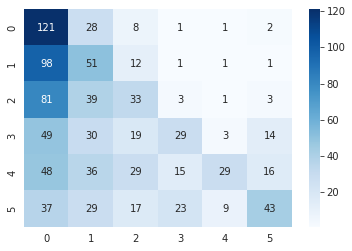

In [108]:
display_confusion_matrix(y_test, y_pred_knn)

Trying to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [109]:
# Train k-NN classifier with custom hyperparameters
reg_knn_improved = KNeighborsClassifier(n_neighbors=10, p=2, weights='distance')
pipe_knn_improved = Pipeline([('vectorizer', tfidfVectorizer),
                     ('classifier', reg_knn_improved)])

# the "fit" function returns a trained model that can then be used to make predictions on new data.
pipe_knn_improved.fit(X_train, y_train)

# making predictions with the knn improved
y_pred_knn_improved = pipe_knn_improved.predict(X_test)


Calculate accuracy, precision, recall and F1 score on the test set.

In [110]:
print_classification_report(y_test, y_pred_knn_improved)

              precision    recall  f1-score   support

           0       0.30      0.71      0.43       161
           1       0.28      0.35      0.31       164
           2       0.31      0.24      0.27       160
           3       0.47      0.29      0.36       144
           4       0.64      0.20      0.30       173
           5       0.52      0.35      0.42       158

    accuracy                           0.36       960
   macro avg       0.42      0.36      0.35       960
weighted avg       0.42      0.36      0.35       960



In [111]:
# print classification metrics
print_classification_metrics(y_test, y_pred_knn_improved)

Accuracy: 0.3563
Recall: 0.3563
F1 Score: 0.3460


Display confusion matrix to have a visual representation.


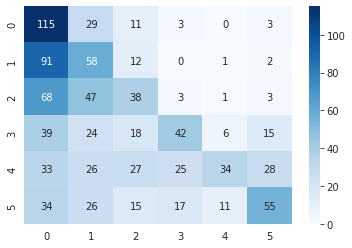

In [112]:
display_confusion_matrix(y_test, y_pred_knn_improved)

#### 2.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [113]:
# import some additional packages 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [114]:
# define classifier
tree = DecisionTreeClassifier()

#create pipeline
pipe_tree = Pipeline([('vectorizer', tfidfVectorizer),
                      ('classifier', tree)])

# the "fit" function returns a trained model that can then be used to make predictions on new data.
pipe_tree.fit(X_train, y_train)

# making a prediction with the decision tree model
y_pred_tree = pipe_tree.predict(X_test)


Calculate accuracy, precision, recall and F1 score on the test set.

In [115]:
print_classification_report(y_test, y_pred_tree)

              precision    recall  f1-score   support

           0       0.43      0.53      0.47       161
           1       0.32      0.34      0.33       164
           2       0.20      0.22      0.21       160
           3       0.24      0.28      0.26       144
           4       0.30      0.21      0.25       173
           5       0.31      0.23      0.27       158

    accuracy                           0.30       960
   macro avg       0.30      0.30      0.30       960
weighted avg       0.30      0.30      0.30       960



In [116]:
# print classification metrics
print_classification_metrics(y_test, y_pred_tree)

Accuracy: 0.3021
Recall: 0.3021
F1 Score: 0.2980


Display confusion matrix to have a visual representation.


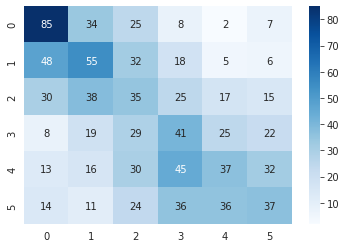

In [117]:
display_confusion_matrix(y_test, y_pred_tree)

Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [118]:
# improving it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).
tree_improved = DecisionTreeClassifier(max_depth=16)
pipe_tree_improved =Pipeline([('vectorizer', tfidfVectorizer),
                     ('classifier', tree_improved)]) 

# the "fit" function returns a trained model that can then be used to make predictions on new data.
pipe_tree_improved.fit(X_train, y_train)

# Make a prediction and print results
y_pred_tree_improved = pipe_tree_improved.predict(X_test)

Calculate accuracy, precision, recall and F1 score on the test set.

---



In [119]:
print_classification_report(y_test, y_pred_tree_improved)

              precision    recall  f1-score   support

           0       0.37      0.56      0.44       161
           1       0.31      0.29      0.30       164
           2       0.24      0.19      0.21       160
           3       0.28      0.45      0.34       144
           4       0.39      0.18      0.25       173
           5       0.34      0.26      0.29       158

    accuracy                           0.32       960
   macro avg       0.32      0.32      0.31       960
weighted avg       0.32      0.32      0.31       960



In [120]:
# print classification metrics
print_classification_metrics(y_test, y_pred_tree_improved)

Accuracy: 0.3177
Recall: 0.3177
F1 Score: 0.3052


Display confusion matrix to have a visual representation.


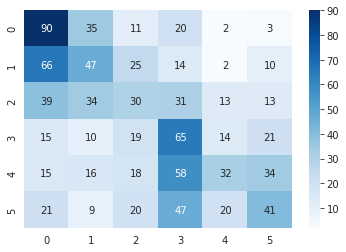

In [121]:
display_confusion_matrix(y_test, y_pred_tree_improved)

#### 2.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [122]:
# Import packages
from sklearn.ensemble import RandomForestClassifier

In [123]:
# Train random forest classifier
reg_rand_f = RandomForestClassifier()
pipe_rand_f = Pipeline([('vectorizer', tfidfVectorizer),
                     ('classifier', reg_rand_f)])

# the "fit" function returns a trained model that can then be used to make predictions on new data.
pipe_rand_f.fit(X_train, y_train)

# making predictions with random forest classifier
y_pred_rand_f = pipe_rand_f.predict(X_test)



Calculate accuracy, precision, recall and F1 score on the test set.




In [ ]:
print_classification_report(y_test, y_pred_rand_f)

In [ ]:
# print classification metrics
print_classification_metrics(y_test, y_pred_rand_f)

Display confusion matrix to have a visual representation.


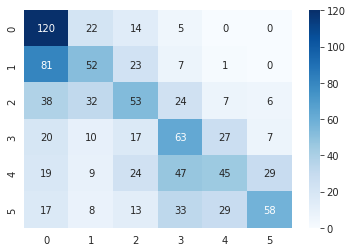

In [126]:
display_confusion_matrix(y_test, y_pred_rand_f)

#### 2.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [127]:
# create new dataframe that I will clean
df2 = df1.copy()

# removing all special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df2['sentence'] = df2['sentence'].str.replace(char, ' ')

# replacing special characters by blank
df2['sentence'] = df2['sentence'].str.split().str.join(" ")
df2

<ipython-input-127-1e1763f93834>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['sentence'] = df2['sentence'].str.replace(char, ' ')


,id,sentence,difficulty,difficulty_encoded
0,0,Les coûts kilométriques réels peuvent diverger...,4,4
1,1,Le bleu c est ma couleur préférée mais je n ai...,0,0
2,2,Le test de niveau en français est sur le site ...,0,0
3,3,Est ce que ton mari est aussi de Boston,0,0
4,4,Dans les écoles de commerce dans les couloirs ...,2,2
...,...,...,...,...
4795,4795,C est pourquoi il décida de remplacer les habi...,3,3
4796,4796,Il avait une de ces pâleurs splendides qui don...,4,4
4797,4797,Et le premier samedi de chaque mois venez renc...,1,1
4798,4798,Les coûts liés à la journalisation n étant pas...,5,5


In [128]:
# import packages
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')

# Initialize the stemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [129]:
# Applies stemming to each token in the input string and returns the stemmed string.
def stem_string(input_string):

  # # Stem each token in the input string
  stemmed_tokens = [stemmer.stem(token) for token in nltk.word_tokenize(input_string)]

  # Join the stemmed tokens into a single string
  stemmed_string = " ".join(stemmed_tokens)

  return stemmed_string

  # Apply the Stemming
  df2['sentence'] = df2['sentence'].apply(stemmed_string)


In [130]:
df2.head()

,id,sentence,difficulty,difficulty_encoded
0,0,Les coûts kilométriques réels peuvent diverger...,4,4
1,1,Le bleu c est ma couleur préférée mais je n ai...,0,0
2,2,Le test de niveau en français est sur le site ...,0,0
3,3,Est ce que ton mari est aussi de Boston,0,0
4,4,Dans les écoles de commerce dans les couloirs ...,2,2


In [131]:
# selecting different variables
X2 = df2['sentence']
y2 = df2['difficulty']

# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

In [132]:
# Define classifier
classifier2 = LogisticRegression()

# Create pipeline 
pipe_reg2 = Pipeline([('vectorizer', tfidfVectorizer),
                      ('classifier', classifier2)])

# fitting pipeline
pipe_reg2.fit(X2_train, y2_train)

# making predictions with this model and data cleaned
y2_pred_reg = pipe_reg2.predict(X2_test)

Calculate accuracy, precision, recall and F1 score on the test set.


In [ ]:
print_classification_report(y2_test, y2_pred_reg)

In [ ]:
print_classification_metrics(y2_test, y2_pred_reg)

Try to improve the model by removing stopwords.

In [ ]:
# from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

In [136]:
# Load the list of French stopwords
french_stopwords = stopwords.words('french')
print(french_stopwords)

# Define a function to remove stopwords from a string
def remove_stopwords(df2):
    # Tokenize the string into words
    words = nltk.word_tokenize(string)
    
    # Remove the stopwords
    filtered_words = [word for word in words if word.lower() not in french_stopwords]
    
    # Join the filtered words back into a single string
    filtered_string = ' '.join(filtered_words)
    
    return filtered_string


['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [137]:
df3 = df2.copy()

In [138]:
def remove_stopwords(string):
    # Tokenize the string into words
    words = nltk.word_tokenize(string)
    
    # Remove the stopwords
    filtered_words = [word for word in words if word.lower() not in french_stopwords]
    
    # Join the filtered words back into a single string
    filtered_string = ' '.join(filtered_words)
    
    return filtered_string

try:
    df3['sentence'] = df3['sentence'].apply(remove_stopwords)
except TypeError as e:
    # Print the value of the cell that caused the error
    print(e)
    print(df3['sentence'][e.row])

# Apply the function to the 'string_column' column of the DataFrame
df3['sentence'] = df3['sentence'].apply(remove_stopwords)

# Display df3 to see if it worked
df3.head()

,id,sentence,difficulty,difficulty_encoded
0,0,coûts kilométriques réels peuvent diverger sen...,4,4
1,1,bleu couleur préférée aime vert,0,0
2,2,test niveau français site Internet école,0,0
3,3,mari aussi Boston,0,0
4,4,écoles commerce couloirs places financières ar...,2,2


In [ ]:

X3 = df3['sentence']
y3 = df3['difficulty']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

In [140]:
# selecting the classifier
classifier3 = LogisticRegression()

# creating pipeline
pipe_reg3 = Pipeline([('vectorizer', tfidfVectorizer),
                      ('classifier', classifier3)])

# fit pipeline
pipe_reg3.fit(X2_train, y_train)

# making a prediction with this dataframe with this cleaned data
y3_pred_reg = pipe_reg3.predict(X3_test)



In [ ]:
# print classification with LogisticRegression
print_classification_report(y3_test, y3_pred_reg)

In [142]:
print_classification_metrics(y3_test, y3_pred_reg)

Accuracy: 0.1656
Recall: 0.1656
F1 Score: 0.1658


In [143]:
# selecting the classifier
reg_knn3 = KNeighborsClassifier()

# creating the pipeline
pipe_knn3 = Pipeline([('vectorizer', tfidfVectorizer),
                      ('classifier', reg_knn3)])

# fit the pipeline
pipe_knn3 = pipe_knn3.fit(X3_train, y_train)

# making prediction with knn and cleaned data
y3_pred_knn = pipe_knn3.predict(X3_test)

# print classification report with this model
print_classification_report(y3_test, y3_pred_knn)

              precision    recall  f1-score   support

           0       0.18      0.17      0.18       167
           1       0.18      0.44      0.25       157
           2       0.17      0.08      0.11       139
           3       0.25      0.13      0.17       151
           4       0.21      0.26      0.24       180
           5       0.40      0.10      0.16       166

    accuracy                           0.20       960
   macro avg       0.23      0.20      0.18       960
weighted avg       0.23      0.20      0.19       960



In [144]:
print_classification_metrics(y3_test, y3_pred_knn)

Accuracy: 0.2000
Recall: 0.2000
F1 Score: 0.1858


Trying to improve accuracy by using Aglomerative Clustering

In [145]:
# import packages
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import adjusted_rand_score

In [146]:
# making copy of the dart
df5 = df2.copy()

X5 = df5['sentence']
y5 = df5['difficulty']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2)

In [147]:
# Use a TfidfVectorizer to create a vector representation of each text
X5_train = tfidfVectorizer.fit_transform(X5_train)
X5_test = tfidfVectorizer.fit_transform(X5_test)

In [148]:
# Converting the sparse matrix X5_train to a dense array for further processing.
X5_train_dense = X5_train.toarray()

# use clustering
clustering5 = AgglomerativeClustering(n_clusters=5, affinity='l1', linkage='single')
clustering5.fit(X5_train_dense)

# fit datas
cluster_labels = clustering5.fit_predict(X5_train_dense)

# making a prediction with this model
score = adjusted_rand_score(y5_train, cluster_labels)
print(f'Adjusted Rand score: {score:}')

Adjusted Rand score: -3.0239536095352023e-05


very low level of agreement between the two clusterings

Trying to improve accuracy by using meta-models

In [ ]:
# Create a new dataset with the predictions made by the base models and the true labels
stacking_data = pd.DataFrame({'classifier2': y2_pred_reg, 'reg2_rand_f':y_pred_rand_f, 'true_label':y2_test})

# Train a meta-model on the new dataset
meta_model = LogisticRegression()
meta_model.fit(stacking_data[['classifier2', 'reg2_rand_f']], stacking_data['true_label'])

# making a prediction with the meta-model
meta_predictions = (y2_pred_reg + y_pred_rand_f) / 2

In [ ]:
# Evaluate the accuracy of the meta-prediction
accuracy = (meta_predictions == y_test).mean()
print(f'Meta-prediction accuracy: {accuracy:}')

In [ ]:
!pip install evaluate
!pip install datasets
!pip install sentencepiece
!pip install transformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
import pandas as pd
import os
import numpy as np
import torch
import torch.nn.functional as F
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from transformers import CamembertTokenizer, CamembertForSequenceClassification

In [ ]:
path = "drive/MyDrive"

data = pd.read_csv(os.path.join(path, "training_data.csv"))
data["labels"] = pd.Categorical(data["difficulty"]).codes
# data["labels"] = data["labels"].apply(lambda x: F.one_hot(x=torch.tensor(x), num_classes=6))

In [ ]:
train, test = train_test_split(data, test_size=0.2, stratify=data["labels"].to_list(), random_state=42)

In [ ]:
!mkdir "drive/MyDrive/training"

train.to_csv(os.path.join(path, "training", "train.csv"), index=False)
test.to_csv(os.path.join(path, "training", "test.csv"), index=False)


In [ ]:
data = load_dataset(os.path.join(path, "training"))

In [ ]:
data = data.remove_columns(["id", "difficulty"])

In [ ]:
id2label = {0: "A1", 1: "A2", 2: "B1", 3: "B2", 4: "C1", 5: "C2"}
label2id = {"A1": 0, "A2": 1, "B1": 2, "B2": 3, "C1": 4, "C2": 5}

In [ ]:
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=6, id2label=id2label, label2id=label2id)

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["sentence"], truncation=True, max_length=512, padding="max_length", return_tensors="pt")

tokenized_data = data.map(preprocess_function, batched=True)
tokenized_data.set_format("pt", columns = ["input_ids", "attention_mask"], output_all_columns=True)
tokenized_data = tokenized_data.remove_columns(["sentence"])


In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [ ]:
torch.cuda.empty_cache()

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="trained_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.001,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer_01 = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer_01.train()



TypeError: ignored

In [ ]:
i = 91

print(data["test"]["sentence"][i], data["test"]["labels"][i])

device = torch.device('cuda:0')
input1 = torch.reshape(tokenized_data["test"]["input_ids"][i], (1, -1)).to(device)
input2 = torch.reshape(tokenized_data["test"]["attention_mask"][i], (1, -1)).to(device)

In [ ]:
model(input_ids= input1,
      attention_mask = input2)

#### 2.7. Show a summary of your results

In [ ]:
# logistic regression score
print_classification_metrics(y_test, y_pred)

In [ ]:
# KNN score
print_classification_metrics(y_test, y_pred_knn)

In [ ]:
#KNN score improved
print_classification_metrics(y_test, y_pred_knn_improved)

In [ ]:
# TREE score
print_classification_metrics(y_test, y_pred_tree)

In [ ]:
# TREE improved
print_classification_metrics(y_test, y_pred_tree_improved)

In [ ]:
# RANDOM FOREST
print_classification_metrics(y_test, y_pred_rand_f)

In [ ]:
# STEMMED DATA
print_classification_metrics(y2_test, y2_pred_reg)

In [ ]:
# REG WITH DATA CLEANED
print_classification_metrics(y3_test, y3_pred_reg)

In [ ]:
# KNN with data cleaned
print_classification_metrics(y3_test, y3_pred_knn)

In [ ]:
# META-MODEL score
print(f'Meta-prediction accuracy: {accuracy:}')